In [4]:
#Import relevant modules.

import pygsti
import numpy as _np

import matplotlib.pyplot as plt
%matplotlib inline

import time
import os

basedir = '/Users/phumphreys/Repositories/analysis/notebooks/Quantum Networks/Simulations/GST'

In [2]:


#Construct a target gateset
gs_target = pygsti.construction.build_gateset([2],[('Q0',)], [u'Gx',u'Gy',u'Gu',u'Gv'], 
                                             [ "X(pi/2,Q0)", "Y(pi/2,Q0)","X(pi,Q0)","Y(pi,Q0)"],
                                             prepLabels=['rho0'], prepExpressions=["0"],
                                             effectLabels=['E0'], effectExpressions=["1"], 
                                             spamdefs={'plus': ('rho0','E0'), 'minus': ('rho0','remainder') } )


gs_real = gs_target.randomize_with_unitary(.001,seed=1234)

max_length = 6
gates = gs_target.gates.keys()

testGermList = pygsti.construction.list_all_gatestrings_without_powers_and_cycles(gates,max_length)

print("Is the raw germ set AC?", pygsti.algorithms.germselection.test_germ_list_infl(gs_real,testGermList))

to_keep_germs = []
for germ in testGermList:
    st=germ.str
    add = True
    lastG = st[-2:]
    if (lastG == 'Gx' or lastG == 'Gy' or lastG == 'Gi'):
        add = False
    if add!= False:
        for x in range(len(st)/2-1):
            curG = st[2*x:(2*x+2)]
            nextG = st[2*(x+1):(2*(x+1)+2)]
            if (curG == 'Gx' or curG == 'Gy' or curG == 'Gi') and (nextG == 'Gx' or nextG == 'Gy' or nextG == 'Gi'):
                add = False
                break
    if add:
        to_keep_germs.append(germ)

print("Is the to keep germ set AC?", pygsti.algorithms.germselection.test_germ_list_infl(gs_real,to_keep_germs))

print len(to_keep_germs)
print len(testGermList)

start = time.time()
germList1 = pygsti.algorithms.germselection.optimize_integer_germs_slack(gs_target,to_keep_germs,numCopies=5,randomizationStrength=0.001,
                                                                         initialWeights=None,slackFrac=0.1,gatePenalty=1e-1,
                                                                         maxIter=300,force="singletons",
                                                                         verbosity=1)
end = time.time()
print()
print("Germ selection completed in", end-start, "seconds.")
print("germList1 is", "not "*(1-pygsti.algorithms.germselection.test_germ_list_infl(gs_real,germList1))+"AC.")

germList2 = pygsti.algorithms.germselection.optimize_integer_germs_slack(gs_target,germList1,numCopies=5,randomizationStrength=0.001,
                                                                         initialWeights=None,slackFrac=0.1,gatePenalty=1e0,
                                                                         maxIter=300,force="singletons",
                                                                         verbosity=1)

print("germList2 is", "not "*(1-pygsti.algorithms.germselection.test_germ_list_infl(gs_real,germList2))+"AC.")


('Is the raw germ set AC?', True)
('Is the to keep germ set AC?', True)
297
964
Complete initial germ set succeeds on all input gatesets.
Now searching for best germ set.
Starting germ set optimization. Lower score is better.
Gateset has 14 gauge params.
  INVALID LEVEL: Moving to better neighbor################---] 94.33% score=377.916, nGerms=170

  INVALID LEVEL: Moving to better neighbor

  INVALID LEVEL: Moving to better neighbor

  INVALID LEVEL: Moving to better neighbor

  INVALID LEVEL: Moving to better neighbor

  INVALID LEVEL: Moving to better neighbor

  INVALID LEVEL: Moving to better neighbor

  INVALID LEVEL: Moving to better neighbor

  INVALID LEVEL: Moving to better neighbor

  INVALID LEVEL: Moving to better neighbor

  INVALID LEVEL: Moving to better neighbor

  INVALID LEVEL: Moving to better neighbor

  INVALID LEVEL: Moving to better neighbor

  INVALID LEVEL: Moving to better neighbor

  INVALID LEVEL: Moving to better neighbor

  INVALID LEVEL: Moving to bette

In [15]:
max_length2 = 5

testGermList2 = pygsti.construction.list_all_gatestrings_without_powers_and_cycles(gates,max_length2)

refGermList = pygsti.algorithms.germselection.optimize_integer_germs_slack(gs_target,testGermList2,numCopies=1,randomizationStrength=0.001,
                                                                         initialWeights=None,slackFrac=0.1,gatePenalty=1e-1,
                                                                         maxIter=300,force="singletons",
                                                                         verbosity=1)

print("refGermList is", "not "*(1-pygsti.algorithms.germselection.test_germ_list_infl(gs_real,refGermList))+"AC.")


Complete initial germ set succeeds on all input gatesets.
Now searching for best germ set.
Starting germ set optimization. Lower score is better.
Gateset has 14 gauge params.
  INVALID LEVEL: Moving to better neighbor################---] 93.67% score=157.487, nGerms=160

  INVALID LEVEL: Moving to better neighbor

  INVALID LEVEL: Moving to better neighbor

  INVALID LEVEL: Moving to better neighbor

  INVALID LEVEL: Moving to better neighbor

  INVALID LEVEL: Moving to better neighbor

  INVALID LEVEL: Moving to better neighbor

  INVALID LEVEL: Moving to better neighbor

  INVALID LEVEL: Moving to better neighbor

  INVALID LEVEL: Moving to better neighbor

  INVALID LEVEL: Moving to better neighbor

  INVALID LEVEL: Moving to better neighbor

  INVALID LEVEL: Moving to better neighbor

  INVALID LEVEL: Moving to better neighbor

  INVALID LEVEL: Moving to better neighbor

  INVALID LEVEL: Moving to better neighbor

  INVALID LEVEL: Moving to better neighbor

  INVALID LEVEL: Moving 

In [18]:
refGermList2 = pygsti.algorithms.germselection.optimize_integer_germs_slack(gs_target,refGermList,numCopies=1,randomizationStrength=0.001,
                                                                         initialWeights=None,slackFrac=0.1,gatePenalty=1e0,
                                                                         maxIter=300,force="singletons",
                                                                         verbosity=1)


Complete initial germ set succeeds on all input gatesets.
Now searching for best germ set.
Starting germ set optimization. Lower score is better.
Gateset has 14 gauge params.
  INVALID LEVEL: Moving to better neighbor-------------------] 0.67% score=220.198, nGerms=15

  INVALID LEVEL: Stationary point found!

score = 242.217758847
weights = [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]
L1(weights) = 15


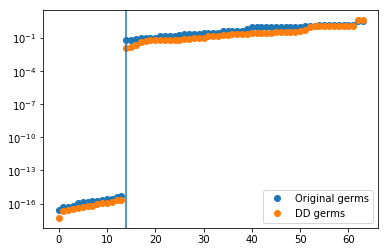

In [19]:
#Let's plot the sorted* eigenvalues of AC and non-AC germ sets.
#The horizontal line delineates gauge from non-gauge parameters.  We can never be sensitive to gauge parameters,
#but to be AC, we must be sensitive to all other parameters.

#*Due to numerical stability issues, some of the vanishingly small eigenvalues are negative;
#we plot their absolute values here.

plt.semilogy(sorted(_np.abs(pygsti.algorithms.germselection.test_germ_list_infl(gs_real,refGermList2,returnSpectrum=True)[1])),'o',label='Original germs')
plt.semilogy(sorted(_np.abs(pygsti.algorithms.germselection.test_germ_list_infl(gs_real,germList2,returnSpectrum=True)[1])),'o',label='DD germs')

plt.axvline(pygsti.algorithms.germselection.num_non_spam_gauge_params(gs_real))
plt.legend(loc='best')

In [20]:
pygsti.io.write_gatestring_list(os.path.join(basedir,"MyGermsLong.txt"), germList1, "My germ gate strings")
pygsti.io.write_gatestring_list(os.path.join(basedir,"MyGerms.txt"), germList2, "My germ gate strings, optimised to reduce the number of germs")
pygsti.io.write_gatestring_list(os.path.join(basedir,"RefGerms.txt"), refGermList2, "Reference germ gate strings")

In [22]:
for germ in germList2:
    print germ

Gu
Gv
GxGuGuGxGv
GxGvGuGyGv
GxGvGvGyGv
GyGuGyGvGv
GyGuGvGvGu
GxGuGxGuGyGv
GxGuGxGvGyGu
GxGuGyGvGyGv
GxGuGvGyGuGu
GxGuGvGyGuGv
GxGvGyGvGuGv
GxGvGuGyGvGu
GxGvGuGyGvGv
